In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch,VerticalPitch
import seaborn as sns
import os
import requests
from bs4 import BeautifulSoup
import json
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [18]:
url=input("enter the url:" " ")

enter the url: https://1xbet.whoscored.com/Matches/1789428/Live/Europe-Champions-League-2023-2024-FC-Porto-Arsenal


In [19]:
response = requests.get(
    url,
    headers={'User-Agent':"Mozilla/5.0"} # you'll be blocked if you don't use some type of user agent
)

In [20]:
response.status_code


200

In [21]:
soup=BeautifulSoup(response.content,"lxml")

In [22]:
scripts=soup.find_all("script")

In [23]:
strings=scripts[20].string

In [24]:
ind_start=strings.index("matchCentreData:")+17
ind_end=strings.index(",\r\n            matchCentreEventTypeJson")

In [25]:
jason_data=strings[ind_start:ind_end]

In [26]:
data=json.loads(jason_data)

In [27]:
events=data["events"]

In [28]:
df=pd.DataFrame(events)

In [29]:
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,endY,relatedEventId,relatedPlayerId,cardType,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,isGoal
0,2.649192e+09,2,0,0,297,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.649192e+09,2,0,0,13,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.649192e+09,3,0,0,297,50.2,49.7,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.649192e+09,4,0,1,297,37.5,38.8,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.649192e+09,5,0,4,297,31.0,16.5,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,50.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,2.649212e+09,856,95,37,13,0.0,0.0,97,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,2.649212e+09,857,0,0,13,0.0,0.0,7,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,2.649212e+09,616,0,0,297,0.0,0.0,7,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,2.649183e+09,1,0,0,297,0.0,0.0,0,"{'value': 16, 'displayName': 'PreMatch'}","{'value': 34, 'displayName': 'FormationSet'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# clean type data
#df["period"]=df["period"].apply(lambda x:str(x))
#df["period"]=df["period"].str.split(":",n=3,expand=True)[2]
#df["period"]=df["period"].str.replace("[^a-zA-Z0-9]",'',regex=True)

In [31]:
# creat function for cleaning
def clean_data(x):
    x1=x.apply(lambda x:str(x))
    x2=x1.str.split(":",n=3,expand=True)[2]
    x3=x2.str.replace("[^a-zA-Z0-9]",'',regex=True)
    return x3



In [32]:
# for period ,type
df["period"]=clean_data(df["period"])
df["type"]=clean_data(df["type"])
df["outcomeType"]=clean_data(df["outcomeType"])

In [33]:
df1=df[["id","eventId","minute","second","teamId","x","y","endX","endY","period","type","outcomeType","playerId"]]

In [34]:
#PLAYER NAME
player_data=data["playerIdNameDictionary"]

In [35]:
player_data=pd.Series(player_data)

In [36]:
player_data=pd.DataFrame(player_data)

In [37]:
player_data.reset_index(inplace=True)

In [38]:
player_data.columns=["playerId","playername"]

In [39]:
player_data["playerId"]=player_data["playerId"].apply(lambda x:int(x))

In [40]:
#MARGE THE NAME OF THE PLAYER AND EVENT DATA
df2=pd.merge(df1,player_data,on="playerId",how="left")

In [41]:
df2["teamId"].unique()

array([297,  13], dtype=int64)

In [42]:
team1=input("enter the team name: ")
team2=input("enter the team name: ")

enter the team name: Porto
enter the team name: Arsenal


In [43]:
#mapping two teams name
a={df2["teamId"].unique()[0]:team1,df2["teamId"].unique()[1]:team2}

In [44]:
df2["teamId"]=df2["teamId"].map(a)

In [45]:
#replace null value with zero
df2[["endX","endY"]]=df2[["endX","endY"]].fillna(0,axis=1)

In [46]:
# import xt grid
xt=pd.read_csv("xT_Grid.csv",header=None)
xT_grid=np.array(xt)
xT_grid.shape

(8, 12)

In [47]:
xT_grid.shape


(8, 12)

In [48]:
xt_cols=xT_grid.shape[0]
xt_rows=xT_grid.shape[1]

In [49]:
df2["x1_bin"]=pd.cut(df2["x"],bins=xt_cols,labels=False)
df2["y1_bin"]=pd.cut(df2["y"],bins=xt_rows,labels=False)
df2["x2_bin"]=pd.cut(df2["endX"],bins=xt_cols,labels=False)
df2["y2_bin"]=pd.cut(df2["endY"],bins=xt_rows,labels=False)

In [50]:
# calculate the xT VALUES
df2['start_zone_value'] = df2[['x1_bin', 'y1_bin']].apply(lambda x: xt[x[1]][x[0]], axis=1)
df2['end_zone_value']=df2[["x2_bin","y2_bin"]].apply(lambda x:xt[x[1]][x[0]], axis=1 )
df2["xt"]=df2["end_zone_value"]-df2["start_zone_value"]



C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\3448601869.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df2['start_zone_value'] = df2[['x1_bin', 'y1_bin']].apply(lambda x: xt[x[1]][x[0]], axis=1)
C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\3448601869.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df2['end_zone_value']=df2[["x2_bin","y2_bin"]].apply(lambda x:xt[x[1]][x[0]], axis=1 )


In [51]:

#calculate sum of all action of xt of two teams
def xt_sum(df):
    df.dropna(subset=["playername"],inplace=True)
    sum_xt=df.groupby(["teamId","playername"])["xt"].sum()
    return sum_xt
        
        

In [52]:
xt_sum(df2)

teamId   playername         
Arsenal  Ben White              0.297735
         Bukayo Saka            0.133322
         David Raya             0.377947
         Declan Rice            1.184949
         Gabriel Magalhães     -1.088890
         Gabriel Martinelli    -2.782423
         Jakub Kiwior          -3.248352
         Jorginho              -0.140200
         Kai Havertz           -0.134918
         Leandro Trossard      -0.730807
         Martin Ødegaard        0.285124
         William Saliba         0.504722
Porto    Alan Varela            0.331110
         Diogo Costa            0.902801
         Evanilson             -0.557757
         Francisco Conceição   -0.097347
         Galeno                -0.789610
         Gonçalo Borges        -0.006941
         Iván Jaime            -0.016972
         João Mário            -0.092165
         Nico González         -0.392265
         Otávio                 0.165561
         Pepe                   0.048867
         Pepê Aquino        

# creating passing network

In [53]:
# first sub
def transform1(df,team):
    
    df["passer"]=df["playername"]
    df["recipiant"]=df["playername"].shift(-1)
    #cleaning complete
    sub=df[(df["teamId"]==team)&(df["type"]== 'SubstitutionOff')]["minute"].min()
    
    clean_data=df[(df["teamId"]==team)&(df["minute"]<sub)&(df["type"]=="Pass")&(df["outcomeType"]=="Successful")]
    clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
    clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
    clean_data["endX"]=clean_data["endX"].apply(lambda x: x*1.2)
    clean_data["endY"]=clean_data["endY"].apply(lambda x: x*.8)
    # start transform
    average_loc=clean_data.groupby("passer").agg({"x":["mean"],"y":["mean","count"],"xt":["sum"]})
    average_loc.columns=["x","y","pass_count","xT"]
    #beteen pass 
    between_loc=clean_data.groupby(["passer","recipiant"]).id.count().reset_index()
    between_loc.rename({"id":"pass_count"},axis="columns",inplace=True)
    pass_between=between_loc.merge(average_loc, left_on='passer',right_index=True)
    pass_between = pass_between.merge(average_loc, left_on="recipiant",right_index=True,suffixes=['', '_end'])
    def normalization(x):
        return (x-x.min())/(x.max()-x.min())
    pass_between["normalization_pass"]=normalization(pass_between["pass_count_x"])
  
    return  pass_between
   
           
    
   
  
    


 


In [54]:
def transform2(df,team):
    
    
    #cleaning complete
    sub=df[(df["teamId"]==team)&(df["type"]== 'SubstitutionOff')]["minute"].min()
    
    clean_data=df[(df["teamId"]==team)&(df["minute"]<sub)&(df["type"]=="Pass")&(df["outcomeType"]=="Successful")]
    clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
    clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
    clean_data["endX"]=clean_data["endX"].apply(lambda x: x*1.2)
    clean_data["endY"]=clean_data["endY"].apply(lambda x: x*.8)
    
    clean_data["passer"]=clean_data["playername"]
    clean_data["recipiant"]=clean_data["passer"].shift(-1)
    # start transform
    average_loc=clean_data.groupby("passer").agg({"x":["mean"],"y":["mean","count"],"xt":["sum"]})
    average_loc.columns=["x","y","pass_count","xT"]
    average_loc.reset_index(inplace=True)
   
    average_loc["passer"]=average_loc["passer"].str.split(" ",n=2,expand=True)[0]
        
   
   
   
   
            
    return average_loc

In [55]:
#home data1
homedata1=transform1(df2,team1)

C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1464492864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1464492864.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1464492864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [56]:
#home data2
homedata2=transform2(df2,team1)

C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1548641876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1548641876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1548641876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [57]:
# away data1
away1_data=transform1(df2,team2)

C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1464492864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1464492864.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1464492864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [58]:
#away data2
away2_data=transform2(df2,team2)

C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1548641876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1548641876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
C:\Users\welcome\AppData\Local\Temp\ipykernel_14024\1548641876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [59]:
away2_data

,passer,x,y,pass_count,xT
0,Ben,51.116667,20.133333,36,0.070378
1,Bukayo,78.078261,14.368696,23,0.110696
2,David,14.603077,35.913846,13,0.393581
3,Declan,53.288727,46.936727,55,1.346779
4,Gabriel,45.338361,48.497049,61,-0.259597
5,Gabriel,79.687059,66.894118,17,-0.320521
6,Jakub,61.279091,69.596364,44,-1.710196
7,Kai,73.663636,58.196364,22,0.121006
8,Leandro,70.692000,49.272000,10,-0.219110
9,Martin,63.048000,30.740000,40,0.477472


In [60]:
homedata2

,passer,x,y,pass_count,xT
0,Alan,54.578182,32.509091,22,0.424615
1,Diogo,10.954286,41.168571,28,0.206768
2,Evanilson,61.320000,51.540000,8,0.200185
3,Francisco,65.655000,12.040000,8,0.000212
4,Galeno,79.848000,57.296000,5,0.182357
5,João,48.560000,8.948571,21,0.020338
6,Nico,54.720000,51.316923,13,-0.066934
7,Otávio,29.805882,61.889412,34,0.298395
8,Pepe,39.268000,19.744000,30,0.073570
9,Pepê,70.306667,21.653333,9,-0.002703


In [61]:
homedata1


,passer,recipiant,pass_count_x,x,y,pass_count_y,xT,x_end,y_end,pass_count,xT_end,normalization_pass
0,Alan Varela,Francisco Conceição,3,54.578182,32.509091,22,0.424615,65.655000,12.040000,8,0.000212,0.1250
16,Evanilson,Francisco Conceição,1,61.320000,51.540000,8,0.200185,65.655000,12.040000,8,0.000212,0.0000
25,Galeno,Francisco Conceição,2,79.848000,57.296000,5,0.182357,65.655000,12.040000,8,0.000212,0.0625
30,João Mário,Francisco Conceição,4,48.560000,8.948571,21,0.020338,65.655000,12.040000,8,0.000212,0.1875
36,Nico González,Francisco Conceição,1,54.720000,51.316923,13,-0.066934,65.655000,12.040000,8,0.000212,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
34,Nico González,Diogo Costa,1,54.720000,51.316923,13,-0.066934,10.954286,41.168571,28,0.206768,0.0000
43,Otávio,Diogo Costa,17,29.805882,61.889412,34,0.298395,10.954286,41.168571,28,0.206768,1.0000
50,Pepe,Diogo Costa,10,39.268000,19.744000,30,0.073570,10.954286,41.168571,28,0.206768,0.5625
58,Pepê Aquino,Diogo Costa,1,70.306667,21.653333,9,-0.002703,10.954286,41.168571,28,0.206768,0.0000


enter club_logo: porto.jpg
enter club_logo: arsenal.png


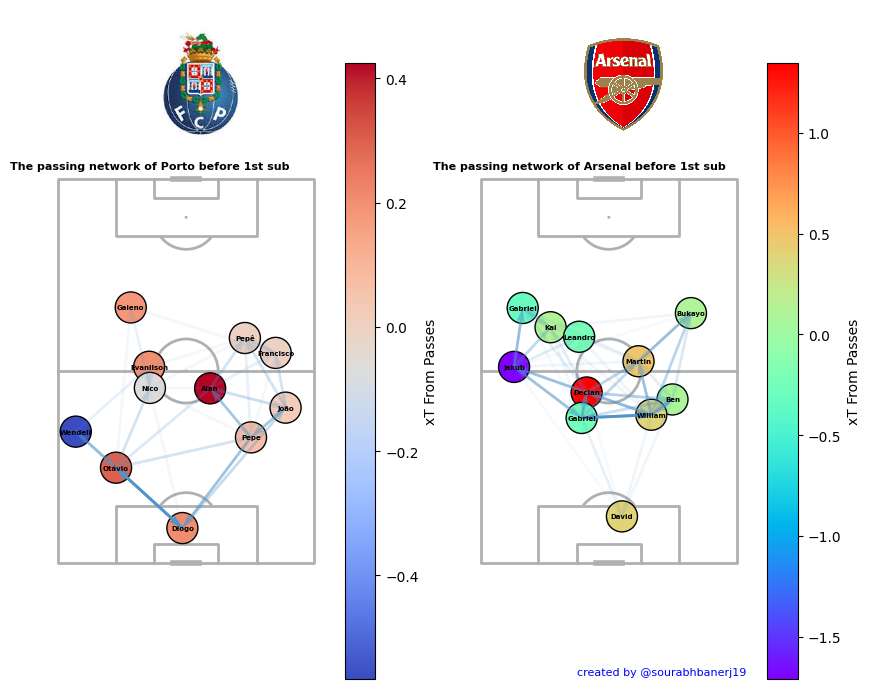

In [62]:
#home team
fig,ax=plt.subplots(1,2,figsize=(10,8))
pitch=VerticalPitch(pitch_type="statsbomb",)
pitch.draw(ax=ax[0])
nodes=pitch.scatter(homedata2["x"],homedata2["y"],ax=ax[0],s=500,cmap='coolwarm',marker="o",edgecolors="k",c=homedata2["xT"],zorder=1)


lines=pitch.arrows(homedata1["x"],homedata1["y"],homedata1["x_end"],homedata1["y_end"],ax=ax[0],lw=3,width=2,zorder=1,color="#4F94CD",alpha=homedata1["normalization_pass"])
ax[0].invert_xaxis()
for index,row in homedata2.iterrows():
    annotation=pitch.annotate(row.passer,xy=(row.x,row.y),c="black",va="center",ha="center",size=5,weight='bold', ax=ax[0])

cbar = plt.colorbar(nodes, label="xT From Passes")
text=ax[0].text(s=f"The passing network of {team1} before 1st sub",x=95,y=123,size=8,weight="bold")
# away team


pitch.draw(ax=ax[1])
nodes=pitch.scatter(away2_data["x"],away2_data["y"],ax=ax[1],s=500,cmap='rainbow',marker="o",edgecolors="k",c=away2_data["xT"],zorder=1)
lines=pitch.arrows(away1_data["x"],away1_data["y"],away1_data["x_end"],away1_data["y_end"],ax=ax[1],lw=3,width=2,zorder=1,color="#4F94CD",alpha=away1_data["normalization_pass"])

for index,row in away2_data.iterrows():
    annotation=pitch.annotate(row.passer,xy=(row.x,row.y),c="black",va="center",ha="center",size=5,weight='bold', ax=ax[1])
ax[1].invert_xaxis()
ax[1].text(s=f"The passing network of {team2} before 1st sub ",x=95,y=123,size=8,weight="bold")
cbar = plt.colorbar(nodes, label="xT From Passes")
ax[1].text(s="created by @sourabhbanerj19",x=50,y=-35,size=8,color="blUE")
club_name1=input("enter club_logo: ")
image_path = 'C:\\Users\\welcome\\Downloads\\my football_work\\logo\\'+club_name1 # Replace 'path_to_your_image.png' with the path to your image
image = plt.imread(image_path)
offset_image = OffsetImage(image, zoom=0.5)

ab = AnnotationBbox(offset_image, (0, 1), frameon=False, xycoords='axes fraction', xybox=(.55,1.20))
ax[0].add_artist(ab)
club_name2=input("enter club_logo: ")
image_path1 = 'C:\\Users\\welcome\\Downloads\\my football_work\\logo\\'+club_name2 # Replace 'path_to_your_image.png' with the path to your image
image1 = plt.imread(image_path1)
offset_image1 = OffsetImage(image1, zoom=0.05)
image1 = plt.imread(image_path1)
ab1 = AnnotationBbox(offset_image1, (0, 1), frameon=False, xycoords='axes fraction', xybox=(.55,1.20))
ax[1].add_artist(ab1)


    

In [ ]:
fig.savefig("team passingnetwork3.png")

# xT start and end